<a href="https://colab.research.google.com/github/jv-technoid/Exploratory-Data-Analysis/blob/main/EDA_REVIEW_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import scipy
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [2]:
pip install kneed

In [18]:
df = pd.read_csv('/content/StudentsPerformance.csv')
print('Missing values before handling:')
print(df.isnull().sum())
df = df.dropna()
print('\nMissing values after handling:')
print(df.isnull().sum())

Missing values before handling:
Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64

Missing values after handling:
Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64


In [28]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
data=df.copy()

In [27]:
X= data.drop("Writing score",axis=1)
Y= data["Writing score"]

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_featurtes = ["Gender","Race/ethnicity","Parental level of education","Lunch","Test preparation course"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_featurtes)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 1.,  0.,  0., ...,  1., 72., 72.],
       [ 1.,  0.,  0., ...,  0., 69., 90.],
       [ 1.,  0.,  0., ...,  1., 90., 95.],
       ...,
       [ 1.,  0.,  0., ...,  0., 59., 71.],
       [ 1.,  0.,  0., ...,  0., 68., 78.],
       [ 1.,  0.,  0., ...,  1., 77., 86.]])

In [31]:
from sklearn.impute import KNNImputer
# Introduce missing values into the 'Writing score' column (for demonstration purposes)
missing_indices = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)  # Randomly select 10% of rows
df.loc[missing_indices, 'Writing score'] = np.nan

# Handle missing data using KNN imputation
imputer = KNNImputer(n_neighbors=5)  # Choose the number of neighbors
data_imputed = imputer.fit_transform(df[['Writing score']])

# Replace the 'Writing score' column with imputed values
df['Writing score'] = data_imputed

# Verify the imputation results (optional)
# Check if any missing values remain in the 'Writing score' column after imputation
missing_values_after_imputation = df['Writing score'].isnull().sum()
print("Missing values in 'Writing score' column after imputation:", missing_values_after_imputation)


Missing values in 'Writing score' column after imputation: 0


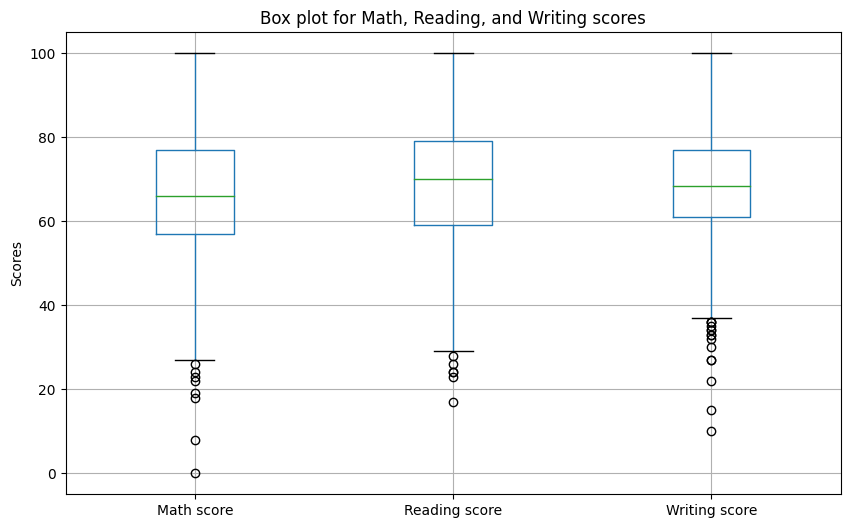

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df.boxplot(column=['Math score', 'Reading score', 'Writing score'])
plt.title('Box plot for Math, Reading, and Writing scores')
plt.ylabel('Scores')

plt.show()

In [40]:
# Filter out non-numeric columns from DataFrame
numeric_df = df.select_dtypes(include='number')

# Calculate variances and standard deviations for numeric columns
variances = numeric_df.var()
standard_deviations = numeric_df.std()

# Print the results
print('Variances:')
print(variances)
print('Standard deviations:')
print(standard_deviations)


Variances:
Gender             0.249926
Math score       229.918998
Reading score    213.165605
Writing score    189.231018
dtype: float64
Standard deviations:
Gender            0.499926
Math score       15.163080
Reading score    14.600192
Writing score    13.756127
dtype: float64


In [42]:
coefficient_of_variance = standard_deviations / variances
print('\nCoefficient of variance:')
print(coefficient_of_variance)


Coefficient of variance:
Gender           2.000296
Math score       0.065950
Reading score    0.068492
Writing score    0.072695
dtype: float64


In [43]:
z_scores = (df[['Math score', 'Reading score', 'Writing score']] - df[['Math score', 'Reading score', 'Writing score']].mean()) / df[['Math score', 'Reading score', 'Writing score']].std()

print('Z-scores:')
print(z_scores)

Z-scores:
     Math score  Reading score  Writing score
0      0.389828       0.193902   4.054599e-01
1      0.191979       1.426762   1.423188e+00
2      1.576922       1.769223   1.786663e+00
3     -1.258913      -0.833482  -1.792961e-03
4      0.653627       0.604855   4.781548e-01
..          ...            ...            ...
995    1.445023       2.043192  -1.033056e-15
996   -0.269668      -0.970467  -1.033056e-15
997   -0.467517       0.125409  -2.487940e-01
998    0.126030       0.604855   6.235446e-01
999    0.719577       1.152793   1.277799e+00

[1000 rows x 3 columns]


In [44]:
skewness = df[['Math score', 'Reading score', 'Writing score']].skew()
print('Skewness:')
print(skewness)

Skewness:
Math score      -0.278935
Reading score   -0.259105
Writing score   -0.250407
dtype: float64


In [45]:
corr_matrix = df[['Math score', 'Reading score', 'Writing score']].corr()
print('Correlation Matrix:')
print(corr_matrix)

Correlation Matrix:
               Math score  Reading score  Writing score
Math score       1.000000       0.817580       0.727993
Reading score    0.817580       1.000000       0.862069
Writing score    0.727993       0.862069       1.000000


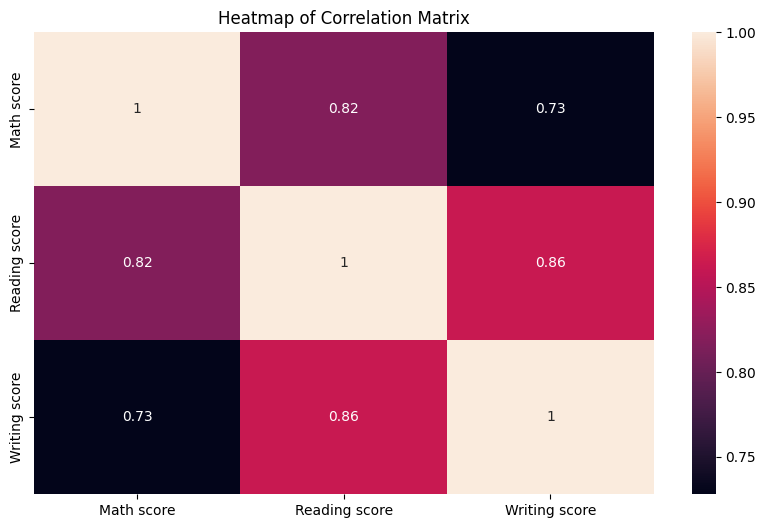

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')

plt.show()

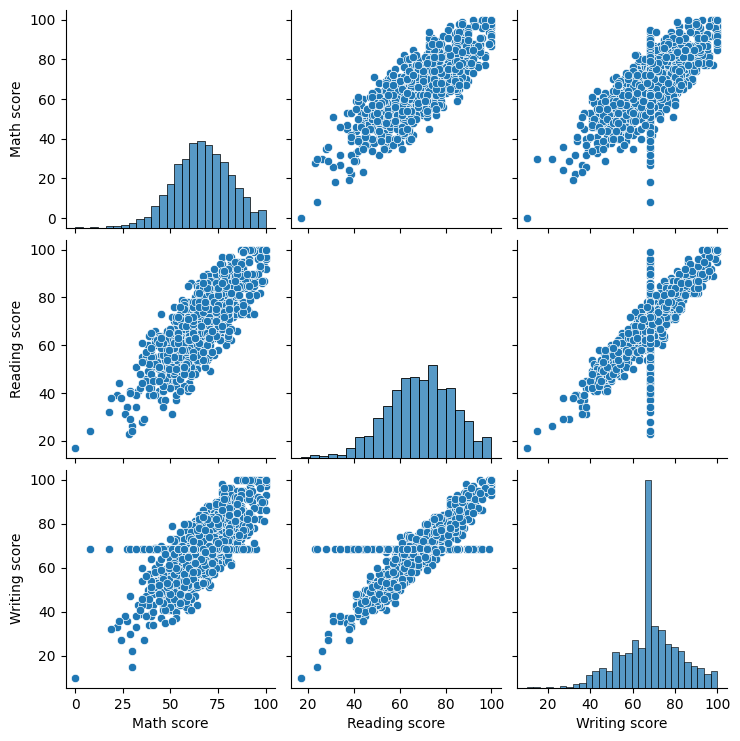

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot matrix
sns.pairplot(df[['Math score', 'Reading score', 'Writing score']])

plt.show()


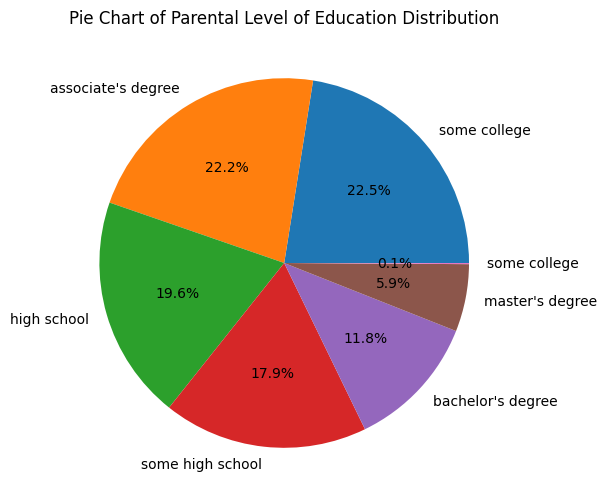

In [50]:
parent_education_counts = df['Parental level of education'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(parent_education_counts, labels=parent_education_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Parental Level of Education Distribution')

plt.show()

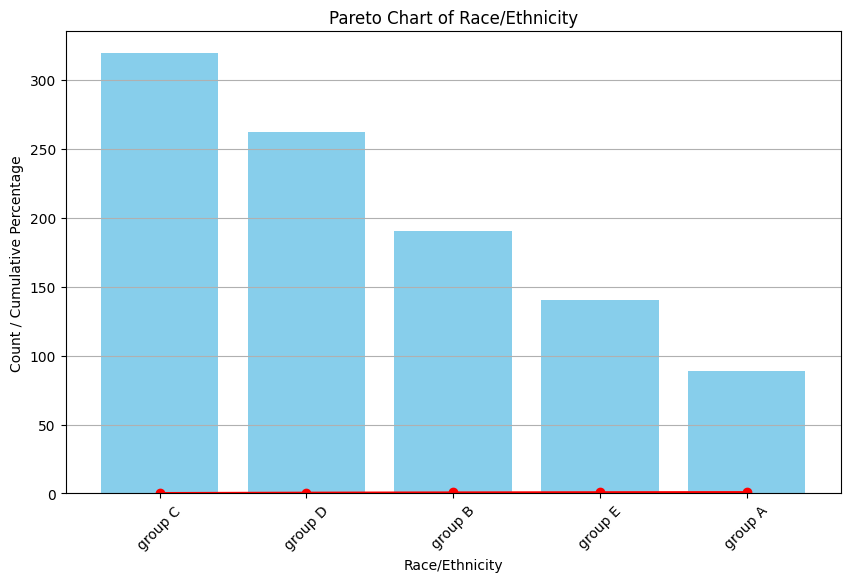

In [51]:
race_counts = df['Race/ethnicity'].value_counts()

race_cumulative = race_counts.cumsum() / race_counts.sum()
plt.figure(figsize=(10, 6))
plt.bar(race_counts.index, race_counts.values, color='skyblue')
plt.plot(race_counts.index, race_cumulative, color='red', marker='o', linestyle='-')
plt.title('Pareto Chart of Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count / Cumulative Percentage')
plt.xticks (rotation=45)
plt.grid(axis='y')

plt.show()

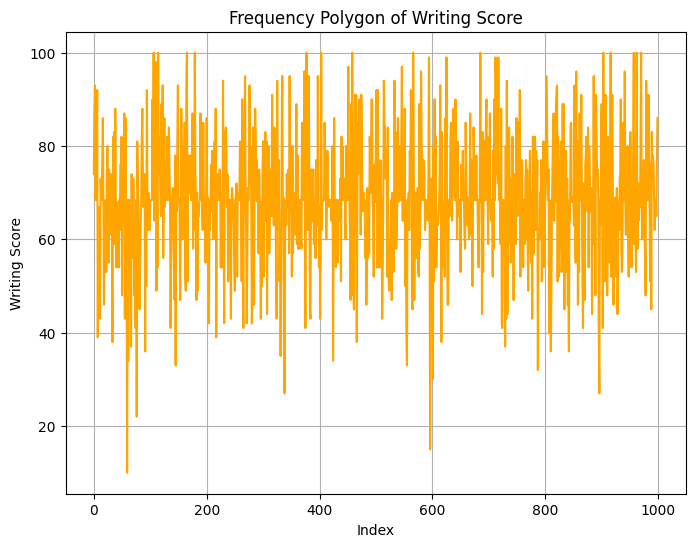

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(df['Writing score'], color='orange')
plt.title('Frequency Polygon of Writing Score')
plt.xlabel('Index')
plt.ylabel('Writing Score')
plt.grid(True)

plt.show()

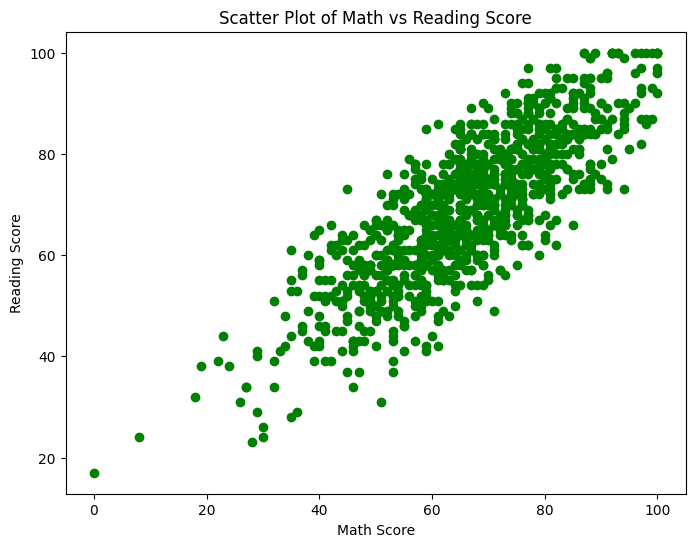

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Math score'], df ['Reading score'], color='green')
plt.title('Scatter Plot of Math vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.show()

In [54]:
import numpy as np
from scipy.spatial import distance

cov_matrix = df[['Math score', 'Reading score', 'Writing score']].cov()
inv_cov_matrix = np.linalg.pinv(cov_matrix.values)
mean_vector = df [['Math score', 'Reading score', 'Writing score']].mean().values
mahalanobis_distance = []

for i in range(len(df)):
  obs = df[['Math score', 'Reading score', 'Writing score']].iloc[i].values
  mahalanobis_distance.append(distance.mahalanobis (obs, mean_vector, VI=inv_cov_matrix))

df_mahalanobis = pd.DataFrame (mahalanobis_distance, columns=['Mahalanobis Distance'])
df_mahalanobis.index = df.index
print("Mahalanobis Distance:")
print(df_mahalanobis)

Mahalanobis Distance:
     Mahalanobis Distance
0                0.626328
1                2.273219
2                1.852292
3                1.986561
4                0.673645
..                    ...
995              4.033293
996              2.068042
997              1.178839
998              0.916216
999              1.352963

[1000 rows x 1 columns]


In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans (n_clusters=3)
kmeans.fit(df [['Math score', 'Reading score', 'Writing score']])
df['Cluster'] = kmeans.labels_
print("K Means Clustering Results:")
print(df)

K Means Clustering Results:
     Gender Race/ethnicity Parental level of education         Lunch  \
0         0        group B           bachelor's degree      standard   
1         0        group C                some college      standard   
2         0        group B             master's degree      standard   
3         1        group A          associate's degree  free/reduced   
4         1        group C                some college      standard   
..      ...            ...                         ...           ...   
995       0        group E             master's degree      standard   
996       1        group C                 high school  free/reduced   
997       0        group C                 high school  free/reduced   
998       0        group D                some college      standard   
999       0        group D                some college  free/reduced   

    Test preparation course  Math score  Reading score  Writing score  Cluster  
0                      non

In [56]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[['Math score', 'Reading score', 'Writing score']])
print("DBSCAN Clustering Results:")
print(df)

DBSCAN Clustering Results:
     Gender Race/ethnicity Parental level of education         Lunch  \
0         0        group B           bachelor's degree      standard   
1         0        group C                some college      standard   
2         0        group B             master's degree      standard   
3         1        group A          associate's degree  free/reduced   
4         1        group C                some college      standard   
..      ...            ...                         ...           ...   
995       0        group E             master's degree      standard   
996       1        group C                 high school  free/reduced   
997       0        group C                 high school  free/reduced   
998       0        group D                some college      standard   
999       0        group D                some college  free/reduced   

    Test preparation course  Math score  Reading score  Writing score  \
0                      none        

In [57]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
df['LOF'] = lof.fit_predict(df[['Math score', 'Reading score', 'Writing score']])
print("LOF Results:")
print(df)

LOF Results:
     Gender Race/ethnicity Parental level of education         Lunch  \
0         0        group B           bachelor's degree      standard   
1         0        group C                some college      standard   
2         0        group B             master's degree      standard   
3         1        group A          associate's degree  free/reduced   
4         1        group C                some college      standard   
..      ...            ...                         ...           ...   
995       0        group E             master's degree      standard   
996       1        group C                 high school  free/reduced   
997       0        group C                 high school  free/reduced   
998       0        group D                some college      standard   
999       0        group D                some college  free/reduced   

    Test preparation course  Math score  Reading score  Writing score  \
0                      none          72          

In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Gender'])
df[['Math score', 'Reading score', 'Writing score']] = df[['Math score', 'Reading score', 'Writing score']].astype(float)
X = df[['Math score', 'Reading score', 'Writing score']].values

from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X, y_encoded)
feature_scores = pd.DataFrame({'Features': ['Math score', 'Reading score', 'Writing score'], 'Score': scores})

print("Mutual Information Feature Selection Scores:")
print(feature_scores)


Mutual Information Feature Selection Scores:
        Features     Score
0     Math score  0.026217
1  Reading score  0.030179
2  Writing score  0.035448


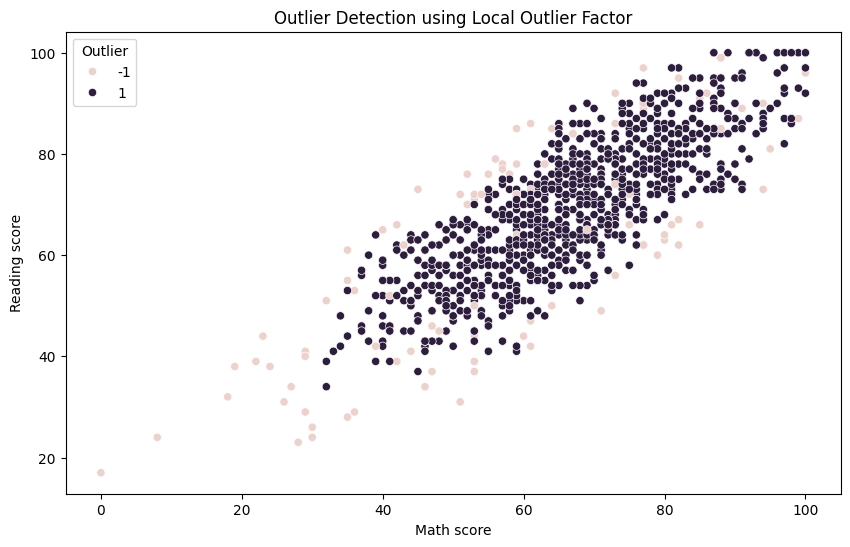

In [61]:
import matplotlib.pyplot as plt
# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the model to the data
y_pred = lof.fit_predict(df[['Math score', 'Reading score', 'Writing score']])

# Add the outlier predictions to the DataFrame
df['Outlier'] = y_pred

# Plot the outlier detection results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Math score', y='Reading score', data=df, hue='Outlier')
plt.title('Outlier Detection using Local Outlier Factor')
plt.show()
